# Secondary Loan Market Simulation Notebook

In [1]:
import Loan
import LoanInvestor
import Trader
import loanMarket
import numpy as np
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'Loan'

In [ ]:
# testing the get loans to sell method of the investor
investor = LoanInvestor.LoanInvestor()
investor.initialize_portfolio([Loan.Loan() for _ in range(10)])

investor.get_loan_to_sell()

investor.loans_for_sale[0].fair_value

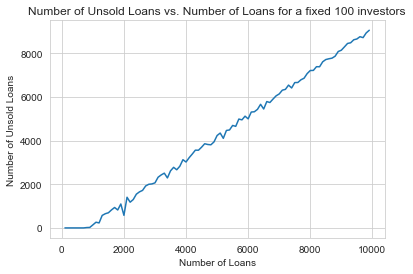

In [3]:
def get_unsold_loans(num_loans, num_investors):
    loans = [Loan.Loan() for _ in range(num_loans)]
    investors = [LoanInvestor.LoanInvestor() for _ in range(num_investors)]

    for investor in investors:
        # regenerating list of available loans
        available_loans = [loan for loan in loans if loan.current_owner == "no owner"]
        investor.generate_initial_capital()
        investor.initialize_portfolio(available_loans)

    unsold_loan_num = len([loan for loan in loans if loan.current_owner == "no owner"])

    return unsold_loan_num


# generating a plot that shows how unsold loans scale with the number of loans versus investors
unsold_loans = [get_unsold_loans(num_loans, 100) for num_loans in range(100, 10000, 100)]
plt.plot(range(100, 10000, 100), unsold_loans)
plt.xlabel("Number of Loans")
plt.ylabel("Number of Unsold Loans")
plt.title("Number of Unsold Loans vs. Number of Loans for a fixed 100 investors")
plt.show()

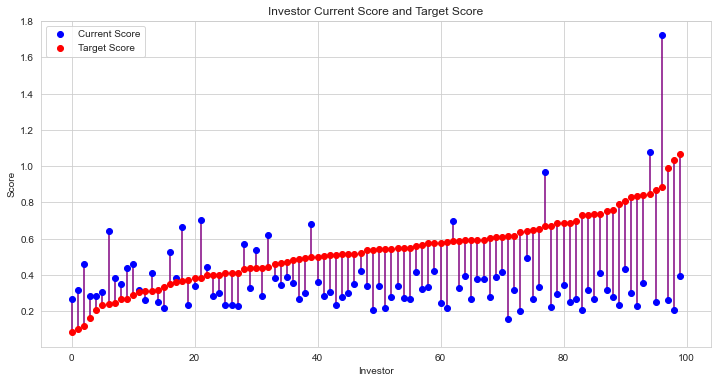

In [7]:
# plotting out the target vs current score for all the investors in the loan market

market = loanMarket.loanMarket(num_loans=10000, num_investors=100, num_traders=10)
market.initialize()

# Sorting the scores for a more organized visualization
current_scores = np.array([investor.current_score for investor in market.investors])
target_scores= np.array([investor.target_score for investor in market.investors])

# Sorting the scores for a more organized visualization
indices = np.argsort(target_scores)
current_scores_sorted = current_scores[indices]
target_scores_sorted = target_scores[indices]

# Creating a scatter plot with connected lines
plt.figure(figsize=(12, 6))
for i in range(market.num_investors):
    plt.plot([i, i], [current_scores_sorted[i], target_scores_sorted[i]], color='purple')  # lines
plt.scatter(range(market.num_investors), current_scores_sorted, color='blue', label='Current Score', zorder=5)
plt.scatter(range(market.num_investors), target_scores_sorted, color='red', label='Target Score', zorder=5)

plt.ylabel("Score")
plt.xlabel("Investor")
plt.title("Investor Current Score and Target Score")
plt.legend()
plt.grid(True)
plt.show()

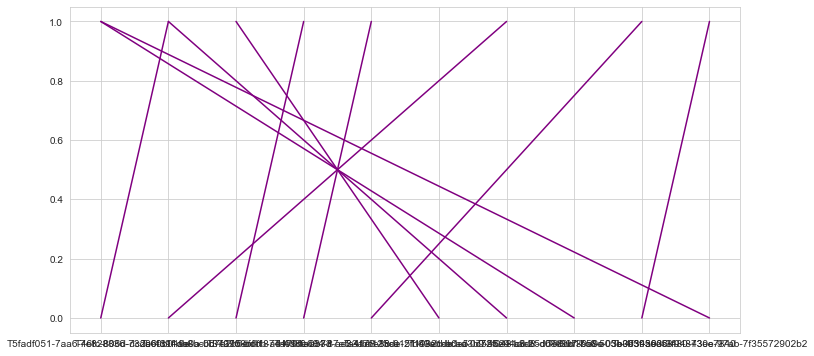

In [6]:
# creating a plot showing the connection between every trader and partner trader
plt.figure(figsize=(12, 6))
for trader in market.traders:
    plt.plot([trader.id, trader.partner_trader.id], [0, 1], color='purple')    

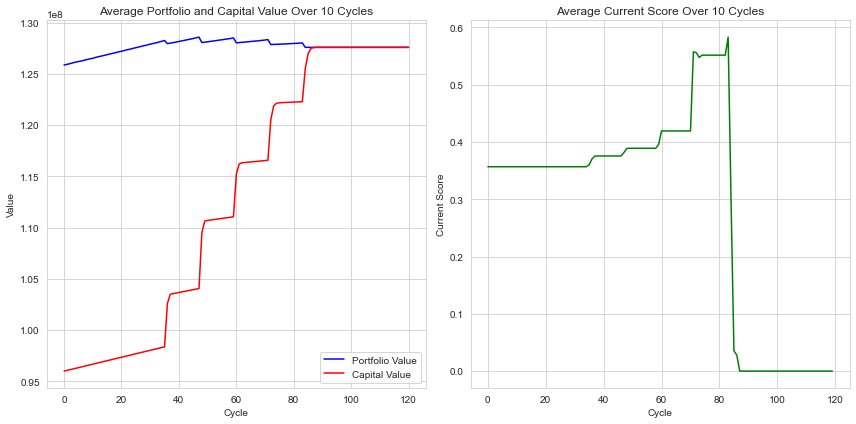

In [8]:
# creating a plot that shows the average portfolio, capital values, and current score over 10 cycles for every investor in the loan market
market = loanMarket.loanMarket(num_loans=10000, num_investors=100, num_traders=10)
market.initialize()

# Initialize the market
market = loanMarket.loanMarket(num_loans=10000, num_investors=100, num_traders=10)
market.initialize()

avg_current_scores = []
portfolio_values = []  
capital_values = []

# Update the market and gather data
for cycle in range(10*12):
    market.update()
    avg_current_scores.append(np.mean([investor.current_score for investor in market.investors]))

for investor in market.investors:
    portfolio_values.append(investor.portfolio_values)
    capital_values.append(investor.capital_history)
    
# Taking the per cycle average of portfolio and capital
avg_portfolio_values = np.mean(portfolio_values, axis=0)
avg_capital_values = np.mean(capital_values, axis=0)

# Plotting the average portfolio, capital and current score over 10 cycles using subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting both portfolio and capital values on the same subplot
axs[0].plot(range(121), avg_portfolio_values, label='Portfolio Value', color='blue')
axs[0].plot(range(121), avg_capital_values, label='Capital Value', color='red')
axs[0].set_title("Average Portfolio and Capital Value Over 10 Cycles")
axs[0].set_ylabel("Value")
axs[0].set_xlabel("Cycle")
axs[0].legend()
axs[0].grid(True)

# Plotting the current score on a separate subplot
axs[1].plot(range(120), avg_current_scores, color='green')
axs[1].set_title("Average Current Score Over 10 Cycles")
axs[1].set_ylabel("Current Score")
axs[1].set_xlabel("Cycle")
axs[1].grid(True)

plt.tight_layout()
plt.show()